In [1]:
# BEGIN SOLUTION
# Put all your imports here.

import pandas as pd
import numpy as np
import datetime as dt
import sqlalchemy as sq

# Introduction


Credit score cards are a common risk control method in the financial industry. It uses personal information and data submitted by credit card applicants to predict the probability of future defaults and credit card borrowings. The bank is able to decide whether to issue a credit card to the applicant. Credit scores can objectively quantify the magnitude of risk.

Credit card application is one of the most classic problems in the field of credit information, and it is also the most mature credit evaluation problem in practice. In recent years, various emerging consumer finance businesses have emerged one after another. Banking credit card centers are an important source of risk control talents in financial industries. The risk evaluation system they have established is ideologically and technically the same as credit card risk management. It can be said that learning the credit card risk evaluation model well will provide a valuable Important  key for us to fully understand the data analysis methods of the financial risk control industry.
 
Generally speaking, credit score cards are based on historical data. Here we will go through detailed steps to develop a data-driven credit risk model in Python to predict and assign credit card elilibility status to existing borrowers. We will determine credit scores using a highly interpretable, easy to understand and implement scorecard that makes calculating the credit score a breeze.

# Individual Datasets and Data Exploration

## Application Record [[1]](https://www.kaggle.com/rikdifos/credit-card-approval-prediction) - By Deshant Sachdeva

##### Dataset Explaination

There are two tables, which are connected by ID. Application Record dataset contains appliers personal information, which you could use as features for predicting.

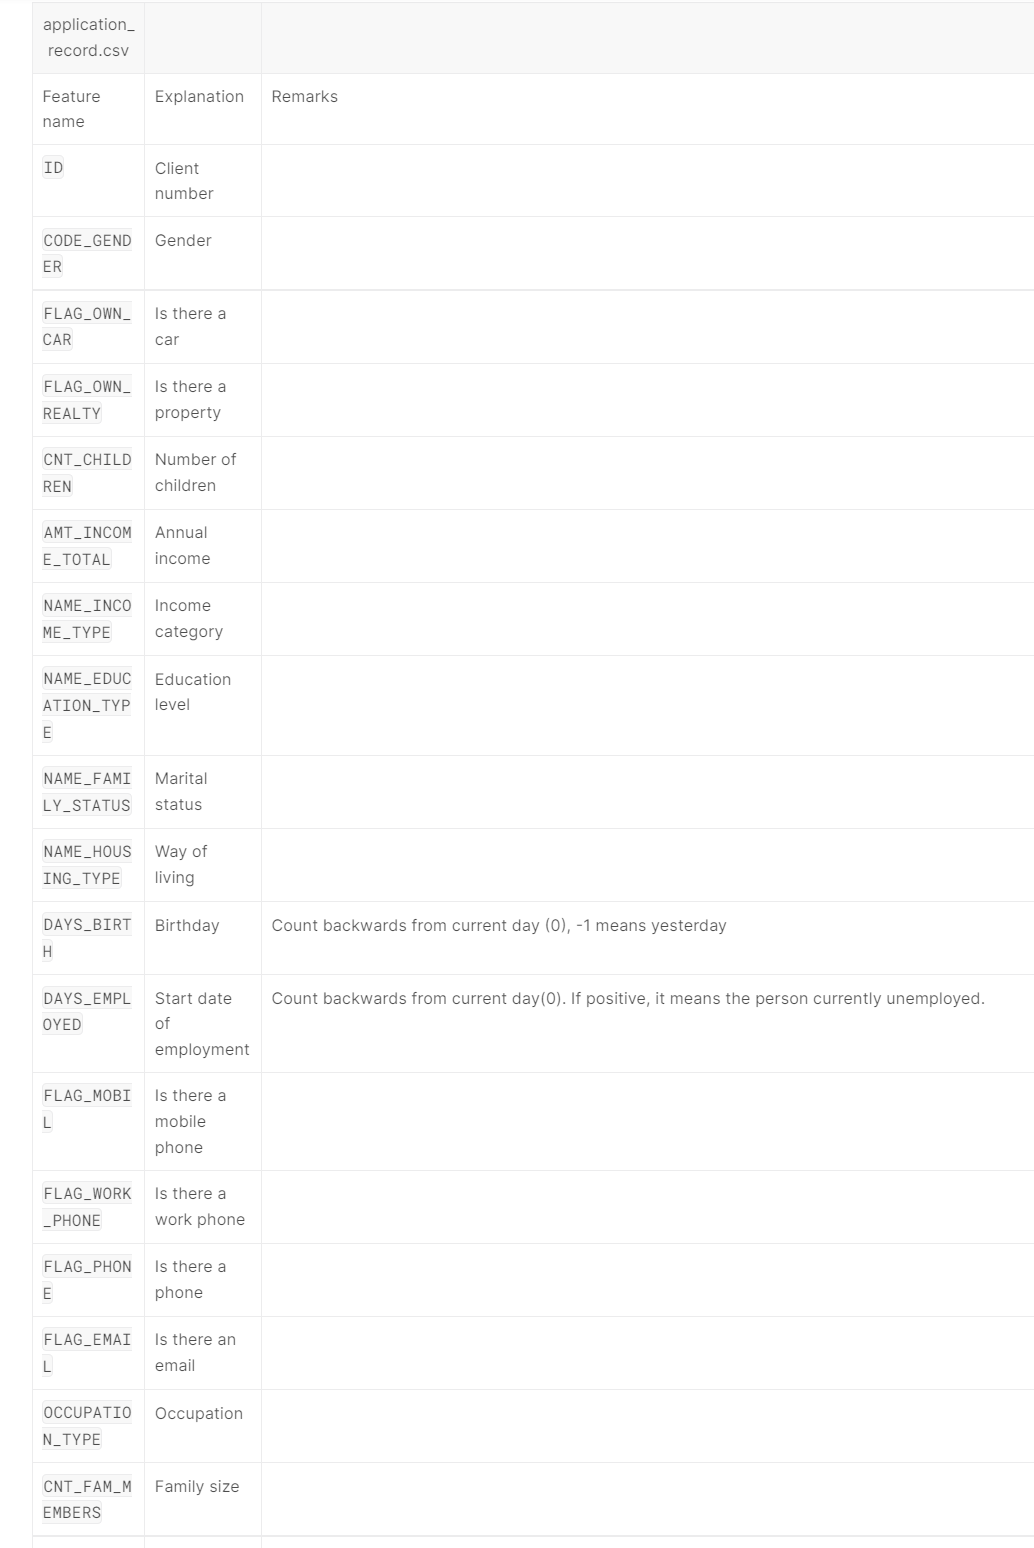

## Loading and displaying the dataset Application Record

In [29]:

application_record = pd.read_csv('./CreditCardPrediction/application_record.csv')

display(application_record)

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0       5008804           M            Y               Y             0   
1       5008805           M            Y               Y             0   
2       5008806           M            Y               Y             0   
3       5008808           F            N               Y             0   
4       5008809           F            N               Y             0   
...         ...         ...          ...             ...           ...   
438552  6840104           M            N               Y             0   
438553  6840222           F            N               N             0   
438554  6841878           F            N               N             0   
438555  6842765           F            N               Y             0   
438556  6842885           F            N               Y             0   

        AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0               427500.0               Working               Higher education   
1               427500.0               Working               Higher education   
2               112500.0               Working  Secondary / secondary special   
3               270000.0  Commercial associate  Secondary / secondary special   
4               270000.0  Commercial associate  Secondary / secondary special   
...                  ...                   ...                            ...   
438552          135000.0             Pensioner  Secondary / secondary special   
438553          103500.0               Working  Secondary / secondary special   
438554           54000.0  Commercial associate               Higher education   
438555           72000.0             Pensioner  Secondary / secondary special   
438556          121500.0               Working  Secondary / secondary special   

          NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0             Civil marriage   Rented apartment      -12005          -4542   
1             Civil marriage   Rented apartment      -12005          -4542   
2                    Married  House / apartment      -21474          -1134   
3       Single / not married  House / apartment      -19110          -3051   
4       Single / not married  House / apartment      -19110          -3051   
...                      ...                ...         ...            ...   
438552             Separated  House / apartment      -22717         365243   
438553  Single / not married  House / apartment      -15939          -3007   
438554  Single / not married       With parents       -8169           -372   
438555               Married  House / apartment      -21673         365243   
438556               Married  House / apartment      -18858          -1201   

        FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0                1                1           0           0             NaN   
1                1                1           0           0             NaN   
2                1                0           0           0  Security staff   
3                1                0           1           1     Sales staff   
4                1                0           1           1     Sales staff   
...            ...              ...         ...         ...             ...   
438552           1                0           0           0             NaN   
438553           1                0           0           0        Laborers   
438554           1                1           0           0     Sales staff   
438555           1                0           0           0             NaN   
438556           1                0           1           0     Sales staff   

        CNT_FAM_MEMBERS  
0                   2.0  
1                   2.0  
2                   2.0  
3                   1.0  
4                   1.0  
...                 ...  
438552              1.0  
438553              1.0  
438554              1.0  
43855

### Dropping columns as they do not have much of the role and impact in determining whether the person should be given a credit card or not. We identified these factors based on the research we did on identifying potential arguments, references to which are as [[8]](https://www.transunion.ca/what-affect-credit-score), [[9]](https://www.canada.ca/en/financial-consumer-agency/services/credit-reports-score/improve-credit-score.html),  [[10]](https://www.experian.com/blogs/ask-experian/credit-education/score-basics/what-affects-your-credit-scores/). Links to other factors are added to references. These columns include, 
 - CODE_GENDER
 - FLAG_OWN_CAR 
 - CNT_CHILDREN
 - NAME_EDUCATION_TYPE
 - NAME_FAMILY_STATUS
 - FLAG_WORK_PHONE
 - FLAG_PHONE 
 - FLAG_EMAIL
 - OCCUPATION_TYPE
 - CNT_FAM_MEMBERS

In [30]:
application_record = application_record.drop(['CODE_GENDER', 'FLAG_OWN_CAR', 'CNT_CHILDREN', 'NAME_EDUCATION_TYPE', 
                                                 'NAME_FAMILY_STATUS', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
                                                 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'], axis = 1)

display(application_record)

ID FLAG_OWN_REALTY  AMT_INCOME_TOTAL      NAME_INCOME_TYPE  \
0       5008804               Y          427500.0               Working   
1       5008805               Y          427500.0               Working   
2       5008806               Y          112500.0               Working   
3       5008808               Y          270000.0  Commercial associate   
4       5008809               Y          270000.0  Commercial associate   
...         ...             ...               ...                   ...   
438552  6840104               Y          135000.0             Pensioner   
438553  6840222               N          103500.0               Working   
438554  6841878               N           54000.0  Commercial associate   
438555  6842765               Y           72000.0             Pensioner   
438556  6842885               Y          121500.0               Working   

        NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  FLAG_MOBIL  
0        Rented apartment      -12005          -4542           1  
1        Rented apartment      -12005          -4542           1  
2       House / apartment      -21474          -1134           1  
3       House / apartment      -19110          -3051           1  
4       House / apartment      -19110          -3051           1  
...                   ...         ...            ...         ...  
438552  House / apartment      -22717         365243           1  
438553  House / apartment      -15939          -3007           1  
438554       With parents       -8169           -372           1  
438555  House / apartment      -21673         365243           1  
438556  House / apartment      -18858          -1201           1  

[438557 rows x 8 columns]

###  Here we are formatting the DAYS_BIRTH column to the DATE_OF_BIRTH of the person by formatting it. DAYS_BIRTH column count backwards from current day (0), -1 means yesterday. Similarly we format DAYS_EMPLOYED column with a Y and N flag with Y being an indicator that person is employed and N implying a person being unemployed [[2]](https://stackoverflow.com/questions/40104946/how-to-get-date-after-subtracting-days-in-pandas). 

### For the column DAYS_EMPLOYED if positive, it means the person is currently unemployed. We renamed the column FLAG_OWN_REALTY to OWN_PROPERTY making the naming for understandable that the person owns a property. Further after making changes with the help of DAYS_BIRTH and DAYS_EMPLOYED columns we drop them as they are not required further.


In [31]:
application_record['DATE_OF_BIRTH'] = pd.to_datetime('today').strftime("%d-%m-%Y")
application_record['DATE_OF_BIRTH'] = application_record['DATE_OF_BIRTH'].astype('datetime64')

application_record['DATE_OF_BIRTH'] = application_record['DATE_OF_BIRTH'] + application_record.DAYS_BIRTH.apply(lambda x: pd.Timedelta(x, unit='D'))

application_record['EMPLOYMENT_STATUS'] = np.where(application_record['DAYS_EMPLOYED'] < 0, 'Y', 'N')

application_record = application_record.rename(columns={'FLAG_OWN_REALTY': 'OWN_PROPERTY'})

application_record_data = application_record.drop(['DAYS_BIRTH', 'DAYS_EMPLOYED'], axis = 1)

display(application_record_data)

ID OWN_PROPERTY  AMT_INCOME_TOTAL      NAME_INCOME_TYPE  \
0       5008804            Y          427500.0               Working   
1       5008805            Y          427500.0               Working   
2       5008806            Y          112500.0               Working   
3       5008808            Y          270000.0  Commercial associate   
4       5008809            Y          270000.0  Commercial associate   
...         ...          ...               ...                   ...   
438552  6840104            Y          135000.0             Pensioner   
438553  6840222            N          103500.0               Working   
438554  6841878            N           54000.0  Commercial associate   
438555  6842765            Y           72000.0             Pensioner   
438556  6842885            Y          121500.0               Working   

        NAME_HOUSING_TYPE  FLAG_MOBIL DATE_OF_BIRTH EMPLOYMENT_STATUS  
0        Rented apartment           1    1988-03-01                 Y  
1        Rented apartment           1    1988-03-01                 Y  
2       House / apartment           1    1962-03-29                 Y  
3       House / apartment           1    1968-09-17                 Y  
4       House / apartment           1    1968-09-17                 Y  
...                   ...         ...           ...               ...  
438552  House / apartment           1    1958-11-02                 N  
438553  House / apartment           1    1977-05-24                 Y  
438554       With parents           1    1998-09-01                 Y  
438555  House / apartment           1    1961-09-11                 N  
438556  House / apartment           1    1969-05-27                 Y  

[438557 rows x 8 columns]

### Making connection with local database and showing schemas available(we will be inserting data to deshant_sachdeva schema)

In [32]:
with open("password.txt") as f:
    passw = f.read()

# attempt a connection
try:
    connectionString = 'mysql+mysqlconnector://root:{}@localhost:3306/deshant_sachdeva'.format(passw)
    engine = sq.create_engine(connectionString)
    connection = engine.raw_connection()

except:
    print("Problem with connection!!!")
    connection.connect()
    
schema = pd.read_sql_query("SHOW SCHEMAS;", connection)

display(schema)

Database
0    deshant_sachdeva
1  information_schema
2               mysql
3  performance_schema
4                 sys

###  Creating table application_record and columns associated with it. ID represents the primary key

In [33]:
try:

    cursor = connection.cursor()

    createTableApplicationRecord = ("""CREATE TABLE IF NOT EXISTS `application_record` (
      `ID` INT(8),
      `OWN_PROPERTY` CHAR,
      `AMT_INCOME_TOTAL` FLOAT,
      `NAME_INCOME_TYPE` VARCHAR(255),
      `NAME_HOUSING_TYPE` VARCHAR(255),
      `FLAG_MOBIL` INT(2), 
      `DATE_OF_BIRTH` DATETIME,
      `EMPLOYMENT_STATUS` CHAR,
      PRIMARY KEY (ID)
    ) ENGINE=InnoDB;""")
    
    cursor.execute(createTableApplicationRecord)
except:
    print("Problem with connection!!!")
    connection.connect()

### Inserting data into table application_record

In [34]:
application_record_data.to_sql(name="application_record", con = engine, schema="deshant_sachdeva", if_exists='replace', chunksize=10000, index=False)

print("Application record data added.")

Application record data added.


### Displaying tables

In [36]:
tables = pd.read_sql_query("SHOW TABLES;", connection)

display(tables)

Tables_in_deshant_sachdeva
0         application_record
1              credit_record

### Displaying all of the data inserted into table application_record

In [37]:
select_all = pd.read_sql_query("""SELECT * FROM application_record;""" , connection)

display(select_all)

ID OWN_PROPERTY  AMT_INCOME_TOTAL      NAME_INCOME_TYPE  \
0       5008804            Y          427500.0               Working   
1       5008805            Y          427500.0               Working   
2       5008806            Y          112500.0               Working   
3       5008808            Y          270000.0  Commercial associate   
4       5008809            Y          270000.0  Commercial associate   
...         ...          ...               ...                   ...   
438552  6840104            Y          135000.0             Pensioner   
438553  6840222            N          103500.0               Working   
438554  6841878            N           54000.0  Commercial associate   
438555  6842765            Y           72000.0             Pensioner   
438556  6842885            Y          121500.0               Working   

        NAME_HOUSING_TYPE  FLAG_MOBIL DATE_OF_BIRTH EMPLOYMENT_STATUS  
0        Rented apartment           1    1988-03-01                 Y  
1        Rented apartment           1    1988-03-01                 Y  
2       House / apartment           1    1962-03-29                 Y  
3       House / apartment           1    1968-09-17                 Y  
4       House / apartment           1    1968-09-17                 Y  
...                   ...         ...           ...               ...  
438552  House / apartment           1    1958-11-02                 N  
438553  House / apartment           1    1977-05-24                 Y  
438554       With parents           1    1998-09-01                 Y  
438555  House / apartment           1    1961-09-11                 N  
438556  House / apartment           1    1969-05-27                 Y  

[438557 rows x 8 columns]

### Here in this query we are going to filter records of people that are employed and also they can be pensioners. In other ways we filter out records who have some associated income recorded. This is a necessary filter as we do not want to issue credit card to a person who can not afford to have it in first place.

In [38]:
select_with_some_income = pd.read_sql_query("""SELECT * FROM application_record where EMPLOYMENT_STATUS = 'Y'
                                                    and NAME_INCOME_TYPE <> 'Pensioner';""", connection)

display(select_with_some_income)

ID OWN_PROPERTY  AMT_INCOME_TOTAL      NAME_INCOME_TYPE  \
0       5008804            Y          427500.0               Working   
1       5008805            Y          427500.0               Working   
2       5008806            Y          112500.0               Working   
3       5008808            Y          270000.0  Commercial associate   
4       5008809            Y          270000.0  Commercial associate   
...         ...          ...               ...                   ...   
363059  6838056            Y          135000.0         State servant   
363060  6839936            Y          135000.0               Working   
363061  6840222            N          103500.0               Working   
363062  6841878            N           54000.0  Commercial associate   
363063  6842885            Y          121500.0               Working   

        NAME_HOUSING_TYPE  FLAG_MOBIL DATE_OF_BIRTH EMPLOYMENT_STATUS  
0        Rented apartment           1    1988-03-01                 Y  
1        Rented apartment           1    1988-03-01                 Y  
2       House / apartment           1    1962-03-29                 Y  
3       House / apartment           1    1968-09-17                 Y  
4       House / apartment           1    1968-09-17                 Y  
...                   ...         ...           ...               ...  
363059  House / apartment           1    1969-01-08                 Y  
363060  House / apartment           1    1986-08-15                 Y  
363061  House / apartment           1    1977-05-24                 Y  
363062       With parents           1    1998-09-01                 Y  
363063  House / apartment           1    1969-05-27                 Y  

[363064 rows x 8 columns]

### This query filters the records of people having some specific income and also have their own property. This query will help us figure out people who have a less probability to default on credit card payment as they might be less likely to take a home loan in near future. 

In [39]:
select_with_own_property_and_income = pd.read_sql_query("""SELECT * FROM application_record where EMPLOYMENT_STATUS = 'Y'
                                                    and NAME_INCOME_TYPE <> 'Pensioner' and OWN_PROPERTY = 'Y';""", connection)

display(select_with_own_property_and_income)

ID OWN_PROPERTY  AMT_INCOME_TOTAL      NAME_INCOME_TYPE  \
0       5008804            Y          427500.0               Working   
1       5008805            Y          427500.0               Working   
2       5008806            Y          112500.0               Working   
3       5008808            Y          270000.0  Commercial associate   
4       5008809            Y          270000.0  Commercial associate   
...         ...          ...               ...                   ...   
246811  6837905            Y          355050.0               Working   
246812  6837906            Y          355050.0               Working   
246813  6838056            Y          135000.0         State servant   
246814  6839936            Y          135000.0               Working   
246815  6842885            Y          121500.0               Working   

        NAME_HOUSING_TYPE  FLAG_MOBIL DATE_OF_BIRTH EMPLOYMENT_STATUS  
0        Rented apartment           1    1988-03-01                 Y  
1        Rented apartment           1    1988-03-01                 Y  
2       House / apartment           1    1962-03-29                 Y  
3       House / apartment           1    1968-09-17                 Y  
4       House / apartment           1    1968-09-17                 Y  
...                   ...         ...           ...               ...  
246811  House / apartment           1    1977-06-28                 Y  
246812  House / apartment           1    1977-06-28                 Y  
246813  House / apartment           1    1969-01-08                 Y  
246814  House / apartment           1    1986-08-15                 Y  
246815  House / apartment           1    1969-05-27                 Y  

[246816 rows x 8 columns]

### Here in this query we want to filter out people having a mobile number. Mobile number has become an important part of banking and is n=one of the methods by which we identify and notify potential credit card users and their due payments. It is highly likely that a person might miss his/her payment if they are not notified about it. Hence to decrease such risks we will be issuing a credit card to person who has a mobile number.

In [40]:
remove_people_with_no_mobileno = pd.read_sql_query("""SELECT * FROM application_record where EMPLOYMENT_STATUS = 'Y'
                                                    and NAME_INCOME_TYPE <> 'Pensioner' and OWN_PROPERTY = 'Y' and 
                                                    FLAG_MOBIL = 1;""", connection)

display(remove_people_with_no_mobileno)

ID OWN_PROPERTY  AMT_INCOME_TOTAL      NAME_INCOME_TYPE  \
0       5008804            Y          427500.0               Working   
1       5008805            Y          427500.0               Working   
2       5008806            Y          112500.0               Working   
3       5008808            Y          270000.0  Commercial associate   
4       5008809            Y          270000.0  Commercial associate   
...         ...          ...               ...                   ...   
246811  6837905            Y          355050.0               Working   
246812  6837906            Y          355050.0               Working   
246813  6838056            Y          135000.0         State servant   
246814  6839936            Y          135000.0               Working   
246815  6842885            Y          121500.0               Working   

        NAME_HOUSING_TYPE  FLAG_MOBIL DATE_OF_BIRTH EMPLOYMENT_STATUS  
0        Rented apartment           1    1988-03-01                 Y  
1        Rented apartment           1    1988-03-01                 Y  
2       House / apartment           1    1962-03-29                 Y  
3       House / apartment           1    1968-09-17                 Y  
4       House / apartment           1    1968-09-17                 Y  
...                   ...         ...           ...               ...  
246811  House / apartment           1    1977-06-28                 Y  
246812  House / apartment           1    1977-06-28                 Y  
246813  House / apartment           1    1969-01-08                 Y  
246814  House / apartment           1    1986-08-15                 Y  
246815  House / apartment           1    1969-05-27                 Y  

[246816 rows x 8 columns]

### This query filters the records of people having some specific income, have their own property and are living in their own house or appartment. This query will help us figure out people who will have less probability to default on credit card payment as they are less likely to spend their income to rental expenses.

In [41]:
remove_people_with_rented_apartment = pd.read_sql_query("""SELECT * FROM application_record where EMPLOYMENT_STATUS = 'Y'
                                                    and NAME_INCOME_TYPE <> 'Pensioner' and OWN_PROPERTY = 'Y' and 
                                                    FLAG_MOBIL = 1 and NAME_HOUSING_TYPE <> 'Rented apartment';""", connection)

display(remove_people_with_rented_apartment)

ID OWN_PROPERTY  AMT_INCOME_TOTAL      NAME_INCOME_TYPE  \
0       5008806            Y          112500.0               Working   
1       5008808            Y          270000.0  Commercial associate   
2       5008809            Y          270000.0  Commercial associate   
3       5008810            Y          270000.0  Commercial associate   
4       5008811            Y          270000.0  Commercial associate   
...         ...          ...               ...                   ...   
244238  6837905            Y          355050.0               Working   
244239  6837906            Y          355050.0               Working   
244240  6838056            Y          135000.0         State servant   
244241  6839936            Y          135000.0               Working   
244242  6842885            Y          121500.0               Working   

        NAME_HOUSING_TYPE  FLAG_MOBIL DATE_OF_BIRTH EMPLOYMENT_STATUS  
0       House / apartment           1    1962-03-29                 Y  
1       House / apartment           1    1968-09-17                 Y  
2       House / apartment           1    1968-09-17                 Y  
3       House / apartment           1    1968-09-17                 Y  
4       House / apartment           1    1968-09-17                 Y  
...                   ...         ...           ...               ...  
244238  House / apartment           1    1977-06-28                 Y  
244239  House / apartment           1    1977-06-28                 Y  
244240  House / apartment           1    1969-01-08                 Y  
244241  House / apartment           1    1986-08-15                 Y  
244242  House / apartment           1    1969-05-27                 Y  

[244243 rows x 8 columns]

### Here we are going to find the average of all the values from column AMT_INCOME_TOTAL. We are going to take this amount as a criteria whether a person should be given a credit card or not.

In [42]:
avg_total_income = pd.read_sql_query("""SELECT AVG(AMT_INCOME_TOTAL) FROM application_record;""", connection)

display(avg_total_income)

AVG(AMT_INCOME_TOTAL)
0           187524.28601

### Here in this nested query we are comparing the AMT_INCOME_TOTAL and determining the amount greater then the average as a criteria to predict whether a person is eligible for credit card or not. On the individual front we are going to consider the result from this query and we will be using another dataset credit_data to strengthen the predictability criteria. We will be merging both the datasets or we will be queries from both the datasets to determine the result.

In [43]:
eligible_people_for_creditcard = pd.read_sql_query("""SELECT * FROM application_record where EMPLOYMENT_STATUS = 'Y'
                                                    and NAME_INCOME_TYPE <> 'Pensioner' and OWN_PROPERTY = 'Y' and 
                                                    FLAG_MOBIL = 1 and NAME_HOUSING_TYPE <> 'Rented apartment'
                                                    and AMT_INCOME_TOTAL > (SELECT AVG(AMT_INCOME_TOTAL) 
                                                    FROM application_record);""", connection)

display(eligible_people_for_creditcard)

ID OWN_PROPERTY  AMT_INCOME_TOTAL      NAME_INCOME_TYPE  \
0       5008808            Y          270000.0  Commercial associate   
1       5008809            Y          270000.0  Commercial associate   
2       5008810            Y          270000.0  Commercial associate   
3       5008811            Y          270000.0  Commercial associate   
4       5008815            Y          270000.0               Working   
...         ...          ...               ...                   ...   
102865  6832600            Y          315000.0  Commercial associate   
102866  6836601            Y          337500.0               Working   
102867  6837707            Y          202500.0               Working   
102868  6837905            Y          355050.0               Working   
102869  6837906            Y          355050.0               Working   

        NAME_HOUSING_TYPE  FLAG_MOBIL DATE_OF_BIRTH EMPLOYMENT_STATUS  
0       House / apartment           1    1968-09-17                 Y  
1       House / apartment           1    1968-09-17                 Y  
2       House / apartment           1    1968-09-17                 Y  
3       House / apartment           1    1968-09-17                 Y  
4       House / apartment           1    1974-11-03                 Y  
...                   ...         ...           ...               ...  
102865  House / apartment           1    1978-03-12                 Y  
102866  House / apartment           1    1994-05-21                 Y  
102867  House / apartment           1    1984-01-17                 Y  
102868  House / apartment           1    1977-06-28                 Y  
102869  House / apartment           1    1977-06-28                 Y  

[102870 rows x 8 columns]

### This query gives the total count of the records present after the filters are applied.

In [44]:
eligible_people_for_creditcard_count = pd.read_sql_query("""SELECT Count(*) FROM application_record where EMPLOYMENT_STATUS = 'Y'
                                                    and NAME_INCOME_TYPE <> 'Pensioner' and OWN_PROPERTY = 'Y' and 
                                                    FLAG_MOBIL = 1 and NAME_HOUSING_TYPE <> 'Rented apartment'
                                                    and AMT_INCOME_TOTAL > (SELECT AVG(AMT_INCOME_TOTAL) 
                                                    FROM application_record);""", connection)

display(eligible_people_for_creditcard_count)

Count(*)
0    102870

# Credit Record [[1]](https://www.kaggle.com/rikdifos/credit-card-approval-prediction) - By Wonje Choi

##### Dataset Explaination

There are two tables, which are connected by ID. Credit Record dataset records users' behaviors of credit card.

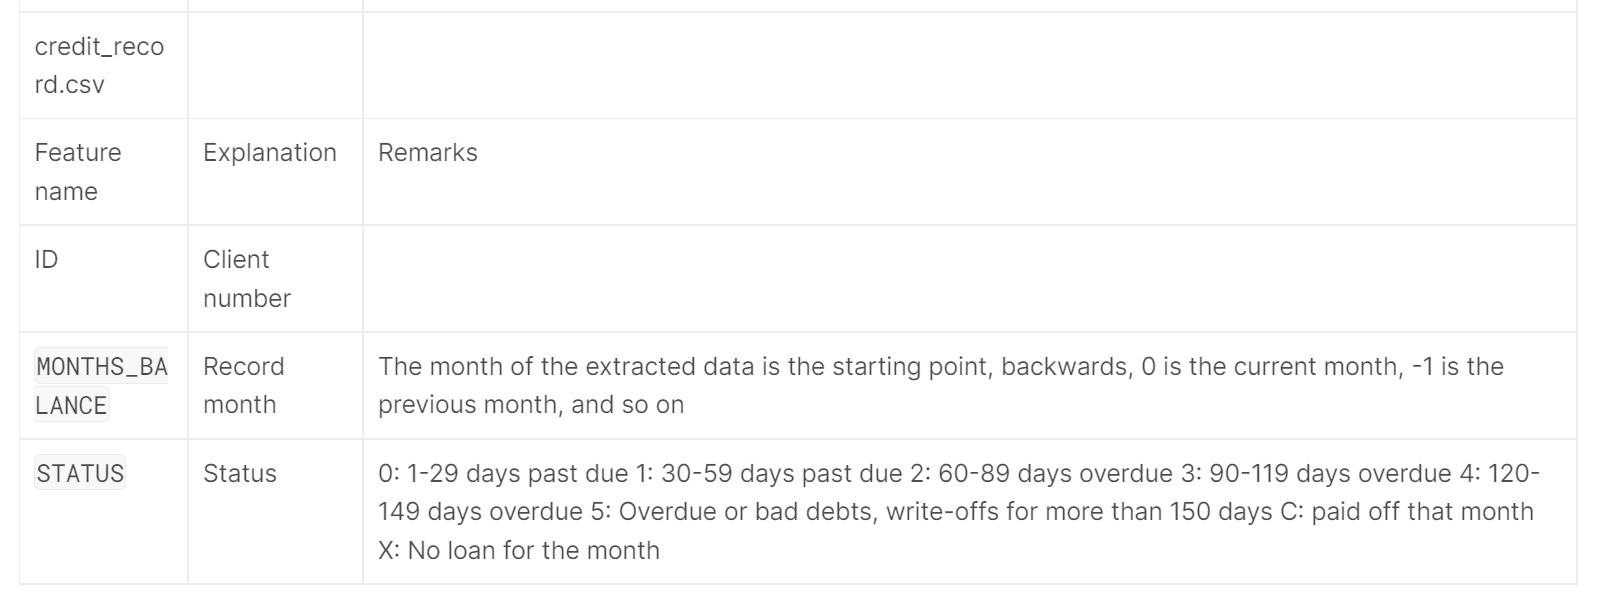

## Loading and displaying the dataset Credit Record

In [13]:
credit_record = pd.read_csv('./CreditCardPrediction/credit_record.csv')

display(credit_record)

ID  MONTHS_BALANCE STATUS
0        5001711               0      X
1        5001711              -1      0
2        5001711              -2      0
3        5001711              -3      0
4        5001712               0      C
...          ...             ...    ...
1048570  5150487             -25      C
1048571  5150487             -26      C
1048572  5150487             -27      C
1048573  5150487             -28      C
1048574  5150487             -29      C

[1048575 rows x 3 columns]

### SQL Queries 1.

### Cleanup and organization the dataset

### From the original dataset, each ID has different number of monthly balances, so I try to restructure the dataframe by groupby each ID. Before doing restructure, I need to check that each ID has different number of monthly balance or not? The reason why do that, if each ID has same number of monthly balance, I can restructure the dataframe by groupby() mean value of monthly balance.

In [15]:
group_by_creditrecord_id = pd.read_sql_query("""SELECT ID, COUNT(ID)
                                                FROM deshant_sachdeva.credit_record
                                                GROUP BY ID;""", connection)

display(group_by_creditrecord_id)

ID  COUNT(ID)
0      5001711          4
1      5001712         19
2      5001713         22
3      5001714         15
4      5001715         60
...        ...        ...
45980  5150482         18
45981  5150483         18
45982  5150484         13
45983  5150485          2
45984  5150487         30

[45985 rows x 2 columns]

### SQL Queries 2.

### Once I confirmed that each ID has different number of ID by the SQL. Hence, I are going to do restructure the dataframe by gourpby each ID.

In [17]:
grouping_month_id = pd.read_sql_query("""SELECT ID, MONTHS_BALANCE, STATUS
FROM  deshant_sachdeva.credit_record
GROUP BY ID, MONTHS_BALANCE;""", connection)

display(grouping_month_id)

ID  MONTHS_BALANCE STATUS
0        5001711               0      X
1        5001711              -1      0
2        5001711              -2      0
3        5001711              -3      0
4        5001712               0      C
...          ...             ...    ...
1048570  5150487             -25      C
1048571  5150487             -26      C
1048572  5150487             -27      C
1048573  5150487             -28      C
1048574  5150487             -29      C

[1048575 rows x 3 columns]

### SQL Queries 3.

### Each ID has different number of monthly balances, so it's hard to make a decision the client who is credit card company approval the applicants base on the monthly balance. All ID has a credit record from our dataset, so we think correcting the data which is the most recently monthly balance's status each ID after that using an inner or outer join between two datasets and various groupings, we will structure our data in SQL. It will help to client can make a decision the application of credit card.

In [19]:
latest_month = pd.read_sql_query("""SELECT ID, MAX(MONTHS_BALANCE), STATUS
FROM  deshant_sachdeva.credit_record
GROUP BY ID;""", connection)

display(latest_month)

ID  MAX(MONTHS_BALANCE) STATUS
0      5001711                    0      X
1      5001712                    0      C
2      5001713                    0      X
3      5001714                    0      X
4      5001715                    0      X
...        ...                  ...    ...
45980  5150482                  -11      C
45981  5150483                    0      X
45982  5150484                    0      C
45983  5150485                    0      0
45984  5150487                    0      C

[45985 rows x 3 columns]

### SQL Queries 4.

### If applicants complain that it is unfair reject or approval by only last month of balances, so we should think other ways. In other way, we can drop the data that applicants who have any overdue or bad debts by their credit status. If applicants have any overdue or bad debts before, the client will reject their credit card application. Based on the dataset, starting from 2 is that overdue or bad debts at STATUS. For example, the value of STATUS is over 1.5, applicants will be rejected their application.

In [20]:
filter_applications = pd.read_sql_query("""SELECT ID, MONTHS_BALANCE, STATUS
FROM deshant_sachdeva.credit_record
WHERE STATUS not like '2' and '3' and '4' and '5'
GROUP BY ID;""", connection)

display(filter_applications)
# citation from W3 Schools - (6)

ID  MONTHS_BALANCE STATUS
0      5001711               0      X
1      5001712               0      C
2      5001713               0      X
3      5001714               0      X
4      5001715               0      X
...        ...             ...    ...
45980  5150482             -11      C
45981  5150483               0      X
45982  5150484               0      C
45983  5150485               0      0
45984  5150487               0      C

[45985 rows x 3 columns]

### SQL Queries 5.

### Moreover, each ID has different number of monthly balances, so we can calculate the average of STATUS and we set up the criteria of average of STATUS. If applicants who have over our criteria of average of STATUS, applicants will get reject their credit card application.

In [25]:
avg_status = pd.read_sql_query("""SELECT ID, MONTHS_BALANCE, AVG(STATUS)
FROM deshant_sachdeva.credit_record
WHERE STATUS
GROUP BY ID;""", connection)

display(avg_status)
# citation from W3 Schools - (7)

ID  MONTHS_BALANCE  AVG(STATUS)
0     5001718              -8          1.0
1     5001720               0          1.0
2     5001757              -3          1.0
3     5001786             -38          1.0
4     5001792              -2          1.0
...       ...             ...          ...
5345  5150412              -7          1.0
5346  5150417             -30          1.0
5347  5150459             -39          1.0
5348  5150463               0          1.0
5349  5150464              -9          1.0

[5350 rows x 3 columns]

## Final merging

### Credit record final data

In [27]:
credit_records_final_data = pd.read_sql_query("""SELECT DISTINCT(ID), STATUS
FROM deshant_sachdeva.credit_record
WHERE (STATUS = 'C' or STATUS = 'X') and MONTHS_BALANCE = 0
GROUP BY ID;""", connection)

display(credit_records_final_data)

ID STATUS
0      5001711      X
1      5001712      C
2      5001713      X
3      5001714      X
4      5001715      X
...        ...    ...
24533  5150479      C
24534  5150481      X
24535  5150483      X
24536  5150484      C
24537  5150487      C

[24538 rows x 2 columns]

### Merging Application record and Credit record dataset

#### Credit record Final Data

In [45]:
credit_records_final_data = pd.read_sql_query("""SELECT DISTINCT(ID), STATUS
FROM deshant_sachdeva.credit_record
WHERE (STATUS = 'C' or STATUS = 'X') and MONTHS_BALANCE = 0
GROUP BY ID;""", connection)

display(credit_records_final_data)

ID STATUS
0      5001711      X
1      5001712      C
2      5001713      X
3      5001714      X
4      5001715      X
...        ...    ...
24533  5150479      C
24534  5150481      X
24535  5150483      X
24536  5150484      C
24537  5150487      C

[24538 rows x 2 columns]

#### Application record Final Data

In [46]:
eligible_people_for_creditcard = pd.read_sql_query("""SELECT * FROM application_record where EMPLOYMENT_STATUS = 'Y'
                                                    and NAME_INCOME_TYPE <> 'Pensioner' and OWN_PROPERTY = 'Y' and 
                                                    FLAG_MOBIL = 1 and NAME_HOUSING_TYPE <> 'Rented apartment'
                                                    and AMT_INCOME_TOTAL > (SELECT AVG(AMT_INCOME_TOTAL) 
                                                    FROM application_record);""", connection)

display(eligible_people_for_creditcard)

ID OWN_PROPERTY  AMT_INCOME_TOTAL      NAME_INCOME_TYPE  \
0       5008808            Y          270000.0  Commercial associate   
1       5008809            Y          270000.0  Commercial associate   
2       5008810            Y          270000.0  Commercial associate   
3       5008811            Y          270000.0  Commercial associate   
4       5008815            Y          270000.0               Working   
...         ...          ...               ...                   ...   
102865  6832600            Y          315000.0  Commercial associate   
102866  6836601            Y          337500.0               Working   
102867  6837707            Y          202500.0               Working   
102868  6837905            Y          355050.0               Working   
102869  6837906            Y          355050.0               Working   

        NAME_HOUSING_TYPE  FLAG_MOBIL DATE_OF_BIRTH EMPLOYMENT_STATUS  
0       House / apartment           1    1968-09-17                 Y  
1       House / apartment           1    1968-09-17                 Y  
2       House / apartment           1    1968-09-17                 Y  
3       House / apartment           1    1968-09-17                 Y  
4       House / apartment           1    1974-11-03                 Y  
...                   ...         ...           ...               ...  
102865  House / apartment           1    1978-03-12                 Y  
102866  House / apartment           1    1994-05-21                 Y  
102867  House / apartment           1    1984-01-17                 Y  
102868  House / apartment           1    1977-06-28                 Y  
102869  House / apartment           1    1977-06-28                 Y  

[102870 rows x 8 columns]

### Final Result

In [50]:
final_result_set = pd.read_sql_query("""SELECT app_rec.ID, credit_rec.STATUS, app_rec.OWN_PROPERTY, app_rec.AMT_INCOME_TOTAL, 
app_rec.NAME_INCOME_TYPE, NAME_HOUSING_TYPE, app_rec.FLAG_MOBIL, 
app_rec.DATE_OF_BIRTH, app_rec.EMPLOYMENT_STATUS
FROM deshant_sachdeva.application_record as 
app_rec

INNER JOIN 

deshant_sachdeva.credit_record as credit_rec
on app_rec.ID = credit_rec.ID

where app_rec.EMPLOYMENT_STATUS = 'Y' and 
app_rec.NAME_INCOME_TYPE <> 'Pensioner' and app_rec.OWN_PROPERTY = 'Y' and 
app_rec.FLAG_MOBIL = 1 and app_rec.NAME_HOUSING_TYPE <> 'Rented apartment'
and 
app_rec.AMT_INCOME_TOTAL > (SELECT AVG(AMT_INCOME_TOTAL) FROM deshant_sachdeva.application_record) 
and 
(credit_rec.STATUS = 'C' or credit_rec.STATUS = 'X') and 
credit_rec.MONTHS_BALANCE = 0
GROUP BY credit_rec.ID;""", connection)

display(final_result_set)

ID STATUS OWN_PROPERTY  AMT_INCOME_TOTAL      NAME_INCOME_TYPE  \
0     5008810      C            Y          270000.0  Commercial associate   
1     5008811      C            Y          270000.0  Commercial associate   
2     5008839      C            Y          405000.0  Commercial associate   
3     5008840      C            Y          405000.0  Commercial associate   
4     5008843      C            Y          405000.0  Commercial associate   
...       ...    ...          ...               ...                   ...   
3838  5135991      C            Y          585000.0  Commercial associate   
3839  5142185      C            Y          450000.0  Commercial associate   
3840  5145846      C            Y          256500.0         State servant   
3841  5149145      C            Y          247500.0               Working   
3842  5149158      C            Y          247500.0               Working   

      NAME_HOUSING_TYPE  FLAG_MOBIL DATE_OF_BIRTH EMPLOYMENT_STATUS  
0     House / apartment           1    1968-09-17                 Y  
1     House / apartment           1    1968-09-17                 Y  
2     House / apartment           1    1988-08-11                 Y  
3     House / apartment           1    1988-08-11                 Y  
4     House / apartment           1    1988-08-11                 Y  
...                 ...         ...           ...               ...  
3838  House / apartment           1    1992-06-23                 Y  
3839  House / apartment           1    1972-03-09                 Y  
3840  House / apartment           1    1972-11-11                 Y  
3841  House / apartment           1    1991-01-18                 Y  
3842  House / apartment           1    1991-01-18                 Y  

[3843 rows x 9 columns]

#### Final Count

In [49]:
final_count = pd.read_sql_query("""SELECT count(*)
FROM deshant_sachdeva.application_record as 
app_rec

INNER JOIN 

deshant_sachdeva.credit_record as credit_rec
on app_rec.ID = credit_rec.ID

where app_rec.EMPLOYMENT_STATUS = 'Y' and 
app_rec.NAME_INCOME_TYPE <> 'Pensioner' and app_rec.OWN_PROPERTY = 'Y' and 
app_rec.FLAG_MOBIL = 1 and app_rec.NAME_HOUSING_TYPE <> 'Rented apartment'
and app_rec.AMT_INCOME_TOTAL > (SELECT AVG(AMT_INCOME_TOTAL) 
FROM deshant_sachdeva.application_record) and 
(credit_rec.STATUS = 'C' or credit_rec.STATUS = 'X') and 
credit_rec.MONTHS_BALANCE = 0
;""", connection)

display(final_count)

count(*)
0      3843

## Discussion

One of important the primary techniques of a data scientist is data wrangling. On the real-world problem, there has so many different types of ways to data wrangling at the same problem, so here we tried different ways of data wrangling and then what final dataset we filtered out we decided to do an inner or outer join between two datasets and various groupings, we chose the structure of our data to be in SQL. We learnt that whatever platform we end up using, we will have the ability to think about what types of operations we need to perform on our datasets. We also tried working on the dataset that is highly relevant and get enhance our data wrangling skills using sql from this project. We learnt about assigning the columns to its relevant datatypes like Timestamp, CHAR etc.

Organizing our dataset to serve a particular need is another skill that is relevant both in python and SQL and across platforms. This project helped us apply that skill on a real-world problem. Analyzing with Python and MySQL, we made the dataset fit better for storing the info in MySQl i.e. in a relational format. Moreover, we can had to choose a predictor variable with R-Studio to analyzing our project that the construction and application of user portraits, and the data marketing topics of retail places by operating with R-Studio in the future. From this project, we learnt to master the basic methods and practical procedures for establishing scoring models and learn to use and display model analysis results. In this process, we were exposed to various problems that can only be encountered in the field of practice

We restructured the two datasets application record and credit record dataset. After doing various data wrangling tasks and doing query based filter operations we filtered out the two datasets. After that we merged with our two datasets by using joins in MySQL that gave us the final result we were aspiring to achieve. 

We also learnt that we could have used Mongo DB database instead of MySQL as the data is not nested and the json records would have been simple to understand. But the name factor that resulted in choosing MySQL was its ability to use joins. This is highly 
revelant as the ID is been considered as primary key. Also by using joins the retrieval become faster making us choose MySQL.

After the research and various learnings like using nested queries, joins and wrangling the data we have learnt a lot about the relevancy of normalized dataset. Our tables are segregated and normalized making SQL queried easier to write and will result in faster retrievals.

## Conclusion

We Identified and used a structured approach that regression is a statistical method that tried to determine the relationship between one dependent variable (Applicants IDs) and independent variables (income, age, and job etc.) from the application record dataset. We identified the potential fields what were not required and didn't had any impact in predicting the eligibility of credit card(8)(9)(10). We converted data types of columns to appropriate and readable format and made sure data wrangling was done.

We predicted the applicant’s (IDs) using the quantitative and qualitative variables. In the absence of an interaction term as,
IDs = β0 + β1*income total +β2*education +β3*jobs +β4*house type +β5*age + β6*number of family members + e.
We tested the significance of regression coefficients for each applicant (IDs) using p-value, then we will discuss the relationship between IDs and each of the independent variables in our project.

In addition, once we merged two datasets using inner join on ID's column, we summarized the status on whether the credit card is approved. Hence, the total number of applicants are 1048575 ; however, the only 3843 applicants get approved by our analysis.



### References

- 1 Dataset, https://www.kaggle.com/rikdifos/credit-card-approval-prediction, Source: https://www.kaggle.com

- 2 Information, https://stackoverflow.com/questions/40104946/how-to-get-date-after-subtracting-days-in-pandas, Source: https://stackoverflow.com

- 3.Seanny. (2020, March 24). Credit Card Approval Prediction. Kaggle. https://www.kaggle.com/rikdifos/credit-card-approval-prediction?select=credit_record.csv

- 4.Seanny. (2020, March 24). Credit Card Approval Prediction. Kaggle. https://www.kaggle.com/rikdifos/credit-card-approval-prediction?select=application_record.csv

- 5.Davies, C. (2021, November 15). MYSQL Connector. University of Calgary.
https://d2l.ucalgary.ca/d2l/le/content/400972/viewContent/4998206/View

- 6.SQL LIKE Operator. (n.d.). W3 Schools. Retrieved November 22, 2021, from https://www.w3schools.com/sql/sql_like.asp

- 7.SQL COUNT(), AVG() and SUM() Functions. (n.d.). W3 Schools. Retrieved November 22, 2021, from https://www.w3schools.com/sql/sql_count_avg_sum.asp

- 8.Factors affecting Credit Score. https://transunion.ca, from https://www.transunion.ca/what-affect-credit-score

- 9.Improving your credit score. , https://www.canada.ca from https://www.canada.ca/en/financial-consumer-agency/services/credit-reports-score/improve-credit-score.html

- 10.What Affects Your Credit Scores? https://www.experian.com from https://www.experian.com/blogs/ask-experian/credit-education/score-basics/what-affects-your-credit-scores/
